### Bibliotecas

In [3]:
import os
import re
import shutil
import zipfile

### Parâmetros

In [4]:
# Caminhos e arquivo de entrada
input_zip_file = r'/Volumes/Dados_na_nuvem/Marcelo/Mestrado PTR/pct1_h_files.zip'
output_folder = r'/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/9_Dissertação/Resultados'

### Estrutura de pastas

In [10]:
# O objetivo é criar uma estrutura mestra de arquivos para auxiliar na organização e interpretação dos resultados.
# Resultados/
# └── Pacote_01/
#    ├── Raw/
#    └── Bacias/
#        └── Aricanduva/
#            └── Clipado/

In [5]:
def criar_pacote(base_path, pacote_num, bacia_nome):
    # Construir caminhos
    pacote_path = os.path.join(base_path, f"Pacote_{pacote_num:02d}")
    raw_path = os.path.join(pacote_path, "Raw")
    bacias_path = os.path.join(pacote_path, "Bacias", bacia_nome)
    clipado_path = os.path.join(bacias_path, "Clipado")
    
    # Criar pastas
    os.makedirs(raw_path, exist_ok=True)
    os.makedirs(clipado_path, exist_ok=True)
    
    print(f"Estrutura criada para {pacote_path}")
    print(f"Incluindo bacia '{bacia_nome}' com diretório 'Clipado'.")

In [5]:
# Parâmetros
pacote_num = 1          # Número do pacote a ser criado
bacia_nome = "Aricanduva"  # Nome da bacia

In [ ]:
# Criar o pacote
criar_pacote(output_folder, pacote_num, bacia_nome)

Estrutura criada para /Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/Arquivos para o Jorge - IC/Pacote_21
Incluindo bacia 'Aricanduva' com diretório 'Clipado'.


### Verificações de integridade do arquivo

In [7]:
# Função para checar acessibilidade de um arquivo
def check_file_accessibility(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Erro: O arquivo '{file_path}' não foi encontrado.")
    if not os.access(file_path, os.R_OK):
        raise PermissionError(f"Erro: O arquivo '{file_path}' não possui permissão de leitura.")
    print(f"Arquivo '{file_path}' está acessível para leitura.")

# Função para checar integridade de um arquivo zip
def check_zip_integrity(zip_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            if not zip_ref.namelist():
                raise ValueError(f"Erro: O arquivo zip '{zip_path}' está vazio.")
            print(f"O arquivo zip '{zip_path}' é válido e contém arquivos.")
    except zipfile.BadZipFile:
        raise ValueError(f"Erro: O arquivo zip '{zip_path}' está corrompido.")

# Função para checar acessibilidade do diretório de saída
def check_output_directory(output_dir):
    if not os.path.exists(output_dir):
        try:
            os.makedirs(output_dir)
            print(f"Diretório de saída '{output_dir}' foi criado com sucesso.")
        except PermissionError:
            raise PermissionError(f"Erro: Sem permissão para criar o diretório '{output_dir}'.")
    elif not os.access(output_dir, os.W_OK):
        raise PermissionError(f"Erro: Sem permissão de escrita no diretório '{output_dir}'.")
    print(f"Diretório de saída '{output_dir}' está acessível para escrita.")

In [8]:
# Executando as verificações
print("Realizando verificações de integridade...")
check_file_accessibility(input_zip_file)
check_zip_integrity(input_zip_file)
check_output_directory(output_folder)
print("Verificações concluídas. Todos os arquivos e diretórios estão em ordem.")

Realizando verificações de integridade...
Arquivo '/Volumes/Dados_na_nuvem/Marcelo/Mestrado PTR/pct21_h_files.zip' está acessível para leitura.
O arquivo zip '/Volumes/Dados_na_nuvem/Marcelo/Mestrado PTR/pct21_h_files.zip' é válido e contém arquivos.
Diretório de saída '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/Arquivos para o Jorge - IC' está acessível para escrita.
Verificações concluídas. Todos os arquivos e diretórios estão em ordem.


### Descompactar e ajustes nos nomes

In [9]:
import os
import re
import shutil
import zipfile

# Início do processo
print("Iniciando o processamento do arquivo zipado...")

pacote_path = os.path.join(output_folder, f"Pacote_{pacote_num:02d}")
raw_files_folder = os.path.join(pacote_path, "Raw")

# Extrair o arquivo zip para o diretório de raw files
print(f"Extraindo os arquivos do zip para o diretório: {raw_files_folder}")
with zipfile.ZipFile(input_zip_file, 'r') as zip_ref:
    zip_ref.extractall(raw_files_folder)
print("Arquivos extraídos com sucesso.")

Iniciando o processamento do arquivo zipado...
Extraindo os arquivos do zip para o diretório: /Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/Arquivos para o Jorge - IC/Pacote_21/Raw
Arquivos extraídos com sucesso.


In [10]:
# Regex para identificar números em notação científica
scientific_notation_pattern = re.compile(r'(-?\d+\.\d+e[+-]?\d+)')

# Função para converter notação científica para número inteiro
def convert_scientific_to_float(match):
    return f"{float(match.group()):.0f}"

# Processar arquivos extraídos
print("Iniciando o processamento dos arquivos '.asc'...")

for filename in os.listdir(raw_files_folder):
    if filename.endswith(".asc"):
        print(f"Processando arquivo: {filename}")
        
        # Verificar e converter o nome do arquivo
        new_filename = scientific_notation_pattern.sub(convert_scientific_to_float, filename)
        
        # Caminhos completos do arquivo de origem e destino
        src = os.path.join(raw_files_folder, filename)
        dst = os.path.join(raw_files_folder, new_filename)
        
        try:
            # Copiar e renomear o arquivo
            shutil.copyfile(src, dst)
            print(f"Arquivo '{filename}' copiado e renomeado para '{new_filename}'.")
            
            # Apagar o arquivo original
            os.remove(src)
            print(f"Arquivo original '{filename}' removido com sucesso.")
        except Exception as e:
            print(f"Erro ao processar '{filename}': {e}")

print("Processamento dos arquivos '.asc' concluído.")
print("Todos os arquivos foram processados com sucesso.")

Iniciando o processamento dos arquivos '.asc'...
Processando arquivo: pct21.0_h_4.4928e+06.asc
Arquivo 'pct21.0_h_4.4928e+06.asc' copiado e renomeado para 'pct21.0_h_4492800.asc'.
Arquivo original 'pct21.0_h_4.4928e+06.asc' removido com sucesso.
Processando arquivo: pct21.0_h_4.41e+06.asc
Arquivo 'pct21.0_h_4.41e+06.asc' copiado e renomeado para 'pct21.0_h_4410000.asc'.
Arquivo original 'pct21.0_h_4.41e+06.asc' removido com sucesso.
Processando arquivo: pct21.0_h_4.482e+06.asc
Arquivo 'pct21.0_h_4.482e+06.asc' copiado e renomeado para 'pct21.0_h_4482000.asc'.
Arquivo original 'pct21.0_h_4.482e+06.asc' removido com sucesso.
Processando arquivo: pct21.0_h_4.4532e+06.asc
Arquivo 'pct21.0_h_4.4532e+06.asc' copiado e renomeado para 'pct21.0_h_4453200.asc'.
Arquivo original 'pct21.0_h_4.4532e+06.asc' removido com sucesso.
Processando arquivo: pct21.0_h_4.4892e+06.asc
Arquivo 'pct21.0_h_4.4892e+06.asc' copiado e renomeado para 'pct21.0_h_4489200.asc'.
Arquivo original 'pct21.0_h_4.4892e+06.as

### Criar os .TIF

In [11]:
import os
import numpy as np
import rasterio
from rasterio.transform import from_origin
from rasterio.crs import CRS

# Lista de arquivos .tif
asc_files = [file for file in os.listdir(raw_files_folder) if file.endswith('.asc')]

# Parâmetros do CRS e transformações
target_epsg_code = 31983
target_crs = CRS.from_epsg(target_epsg_code)
xmin, ymin, xmax, ymax = (313394.4779, 7343769.0758, 360591.7331, 7416126.9551)
res = 29.1591
transform = from_origin(xmin, ymax, res, res)

# Configurações para GeoTIFF
geo_tiff_config = {
    "driver": "GTiff",
    "count": 1,  # Número de bandas
    "dtype": 'float32',  # Tipo de dados
    "crs": target_crs,
    "transform": transform,
}

print("Iniciando a conversão dos arquivos .asc para GeoTIFF...")

# Loop para converter os arquivos .tif
for asc_name in asc_files:
    asc_path = os.path.join(raw_files_folder, asc_name)
    output_name = f"{os.path.splitext(asc_name)[0]}.tif"
    output_path = os.path.join(raw_files_folder, output_name)
    
    try:
        # Carregar os dados do arquivo .asc
        data = np.loadtxt(asc_path, skiprows=6)  # Ajuste skiprows conforme necessário
        data = np.maximum(data, 0)  # Substituir valores negativos por 0
        
        # Atualizar altura e largura no GeoTIFF config
        geo_tiff_config.update({"height": data.shape[0], "width": data.shape[1]})
        
        # Criar o GeoTIFF
        with rasterio.open(output_path, 'w', **geo_tiff_config) as dst:
            dst.write(data, 1)
        
        print(f"Arquivo convertido: {asc_name} -> {output_name}")
        
        # Apagar o arquivo original
        src = os.path.join(raw_files_folder, asc_name)
        os.remove(src)
        print(f"Arquivo original '{asc_name}' removido com sucesso.")
        
    except Exception as e:
        print(f"Erro ao processar o arquivo {asc_name}: {e}")

print("Conversão concluída com sucesso.")

Iniciando a conversão dos arquivos .asc para GeoTIFF...
Arquivo convertido: pct21.0_h_4406400.asc -> pct21.0_h_4406400.tif
Arquivo original 'pct21.0_h_4406400.asc' removido com sucesso.
Arquivo convertido: pct21.0_h_4456800.asc -> pct21.0_h_4456800.tif
Arquivo original 'pct21.0_h_4456800.asc' removido com sucesso.
Arquivo convertido: pct21.0_h_4496400.asc -> pct21.0_h_4496400.tif
Arquivo original 'pct21.0_h_4496400.asc' removido com sucesso.
Arquivo convertido: pct21.0_h_4467600.asc -> pct21.0_h_4467600.tif
Arquivo original 'pct21.0_h_4467600.asc' removido com sucesso.
Arquivo convertido: pct21.0_h_4453200.asc -> pct21.0_h_4453200.tif
Arquivo original 'pct21.0_h_4453200.asc' removido com sucesso.
Arquivo convertido: pct21.0_h_4410000.asc -> pct21.0_h_4410000.tif
Arquivo original 'pct21.0_h_4410000.asc' removido com sucesso.
Arquivo convertido: pct21.0_h_4424400.asc -> pct21.0_h_4424400.tif
Arquivo original 'pct21.0_h_4424400.asc' removido com sucesso.
Arquivo convertido: pct21.0_h_4474

### Carregar bounding box

In [6]:
import os
import geopandas as gpd

# Caminho do arquivo
path = '/Users/marcelofernandes/PycharmProjects/SP_urban_flooding/bounding_box_bacia.json'

# Verificar se o arquivo existe
if os.path.exists(path):
    print("Arquivo encontrado!")
    if os.access(path, os.R_OK):
        try:
            # Tentar carregar com GeoPandas
            bounding_box_baseline = gpd.read_file(path)
            print("Bounding box carregado com sucesso!")
        except Exception as e:
            print(f"Erro ao carregar o bounding box com GeoPandas: {e}")
    else:
        print("Arquivo encontrado, mas sem permissão de leitura!")
else:
    print("Arquivo não encontrado!")


Arquivo encontrado!
Bounding box carregado com sucesso!


### Clipagem da raster de acordo com bounding box da bacia

In [7]:
import os
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from shapely.geometry import box

# Diretórios e configurações
pacote_path = os.path.join(output_folder, f"Pacote_{pacote_num:02d}")
raw_path = os.path.join(pacote_path, "Raw")
bacias_path = os.path.join(pacote_path, "Bacias", bacia_nome)
clipado_path = os.path.join(bacias_path, "Clipado") # Diretório para salvar os arquivos clipados

In [8]:
# Converter geometria do bounding box para o formato esperado pelo rasterio
bounding_box_geometry = [geom for geom in bounding_box_baseline.geometry]

# Processar arquivos .tif
print("Iniciando a clipagem dos arquivos .tif...")
for filename in os.listdir(raw_path):
    if filename.endswith(".tif"):
        print(f"Processando arquivo: {filename}")
        src_path = os.path.join(raw_path, filename)
        
        try:
            # Abrir o arquivo raster
            with rasterio.open(src_path) as src:
                # Checar CRS
                if bounding_box_baseline.crs != src.crs:
                    bounding_box_baseline = bounding_box_baseline.to_crs(src.crs)
                
                # Verificar sobreposição
                raster_bounds = box(*src.bounds)
                # Usar union_all() em vez de unary_union
                bounding_box_union = bounding_box_baseline.geometry.union_all()
                if not raster_bounds.intersects(bounding_box_union):
                    print(f"A geometria do bounding box não se sobrepõe ao raster: {filename}")
                    continue
                
                # Realizar a clipagem
                out_image, out_transform = mask(src, [bounding_box_union], crop=True)
                out_meta = src.meta.copy()
                out_meta.update({
                    "driver": "GTiff",
                    "height": out_image.shape[1],
                    "width": out_image.shape[2],
                    "transform": out_transform,
                    "crs": src.crs
                })
                
                # Salvar o arquivo clipado
                clipped_filename = os.path.splitext(filename)[0] + "_clp.tif"
                output_path = os.path.join(clipado_path, clipped_filename)
                with rasterio.open(output_path, "w", **out_meta) as dest:
                    dest.write(out_image)
                
                # Definir o caminho de saída com o novo nome
                clipped_filename = os.path.splitext(filename)[0] + "_clp.tif"
                output_path = os.path.join(clipado_path, clipped_filename)
                
                # Salvar o arquivo clipado
                with rasterio.open(output_path, "w", **out_meta) as dest:
                    dest.write(out_image)
                    
                print(f"Arquivo clipado salvo em: {output_path}")
        except Exception as e:
            print(f"Erro ao processar '{filename}': {e}")

print("Clipagem concluída para todos os arquivos .tif.")

Iniciando a clipagem dos arquivos .tif...
Processando arquivo: pct1_h_2692800.tif
Erro ao processar 'pct1_h_2692800.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct1_h_2768400.tif
Erro ao processar 'pct1_h_2768400.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct1_h_2710800.tif
Erro ao processar 'pct1_h_2710800.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct1_h_2728800.tif
Erro ao processar 'pct1_h_2728800.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct1_h_2750400.tif
Erro ao processar 'pct1_h_2750400.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct1_h_2721600.tif
Erro ao processar 'pct1_h_2721600.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct1_h_2707200.tif
Erro ao processar 'pct1_h_2707200.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct1_h_2703600.tif
Erro ao processar 'pct

KeyboardInterrupt: 

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 1479, in info
    def info(self, msg, *args, **kwargs):

KeyboardInterrupt: 


Erro ao processar 'pct1_h_2725200.tif': '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/9_Dissertação/Resultados/Pacote_01/Raw/pct1_h_2725200.tif' not recognized as being in a supported file format.
Processando arquivo: pct1_h_2739600.tif
Erro ao processar 'pct1_h_2739600.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct1_h_2754000.tif
Erro ao processar 'pct1_h_2754000.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct1_h_2714400.tif
Erro ao processar 'pct1_h_2714400.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct1_h_2743200.tif
Erro ao processar 'pct1_h_2743200.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct1_h_2696400.tif
Erro ao processar 'pct1_h_2696400.tif': 'GeoSeries' object has no attribute 'union_all'
Processando arquivo: pct

### Transferindo o TIF de alagamento para a rede viária

In [10]:
import osmnx as ox
import os

path_rede = '/Users/marcelofernandes/PycharmProjects/SP_urban_flooding/network_baseline_vel_updated.graphml'

# Verificar se o arquivo existe antes de tentar carregar
if os.path.exists(path_rede):
    try:
        G_baseline = ox.load_graphml(path_rede)
        print('\nGrafo carregado com sucesso!\n')
    except Exception as e:
        print(f'Erro ao carregar o grafo: {e}')
else:
    print('Arquivo não encontrado no caminho especificado.')


Grafo carregado com sucesso!



In [11]:
node_baseline, edges_baseline = ox.graph_to_gdfs(G_baseline)

#TODO Atualizar as velocidades para incluir o MapaRadar

In [12]:
edges_baseline.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 8333 entries, (597447, 25778775, 0) to (12013065742, 1269523805, 0)
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   osmid      8333 non-null   object  
 1   oneway     8333 non-null   bool    
 2   lanes      7167 non-null   object  
 3   ref        203 non-null    object  
 4   name       7047 non-null   object  
 5   highway    8333 non-null   object  
 6   maxspeed   2906 non-null   object  
 7   reversed   8333 non-null   object  
 8   length     8333 non-null   float64 
 9   geometry   8333 non-null   geometry
 10  speed_kph  8333 non-null   float64 
 11  bridge     270 non-null    object  
 12  access     37 non-null     object  
 13  tunnel     12 non-null     object  
 14  junction   263 non-null    object  
 15  est_width  38 non-null     object  
 16  width      13 non-null     object  
dtypes: bool(1), float64(2), geometry(1), object(13)
memory us

In [13]:
import pandas as pd

# Calcula os intervalos (bins) e as frequências
hist_data = pd.cut(edges_baseline['speed_kph'], bins=20).value_counts().sort_index()

# Exibe como tabela
hist_table = pd.DataFrame({'Intervalo': hist_data.index.astype(str), 'Frequência': hist_data.values})
print(hist_table)

        Intervalo  Frequência
0   (19.93, 23.5]           9
1    (23.5, 27.0]           0
2    (27.0, 30.5]          78
3    (30.5, 34.0]           0
4    (34.0, 37.5]           6
5    (37.5, 41.0]        3640
6    (41.0, 44.5]           0
7    (44.5, 48.0]          36
8    (48.0, 51.5]        4270
9    (51.5, 55.0]           4
10   (55.0, 58.5]           0
11   (58.5, 62.0]         260
12   (62.0, 65.5]          10
13   (65.5, 69.0]           0
14   (69.0, 72.5]           7
15   (72.5, 76.0]           0
16   (76.0, 79.5]           0
17   (79.5, 83.0]           0
18   (83.0, 86.5]           0
19   (86.5, 90.0]          13


In [14]:
# Determinar os pixels acima do threshold
threshold = 70  # Valor informado em milímetros, mas convertido para metros, em função do raster. Valor obtido a partir da IC do Rodrigo.
threshold_max = 300 # Valor obtido a partir do paper da Pregnolato. Novamente, valor informado em milímetros, mas convertido para metros.

In [33]:
def adjust_speed_batch(row, raster_data, transform, threshold, threshold_max, speed_column):
    """
    Ajusta a velocidade de um segmento com base na profundidade do alagamento extraída de um raster.

    Parâmetros:
        row (GeoSeries): Linha atual do GeoDataFrame contendo informações de velocidade e geometria.
        raster_data (numpy.ndarray): Dados do raster contendo profundidade de alagamento.
        transform (Affine): Transformação do raster para coordenadas espaciais.
        threshold (float): Profundidade mínima para ajustar a velocidade.
        threshold_max (float): Profundidade máxima que torna a via intransitável.
        speed_column (str): Nome da coluna de referência para a velocidade original.
    
    Retorno:
        float: Velocidade ajustada para o segmento.
    """

    # Encontrar a coordenada do centro do segmento
    centroid = row.geometry.centroid

    # Transformar as coordenadas do centroide em índices do raster
    try:
        col_idx, row_idx = ~transform * (centroid.x, centroid.y) # Observe a ordem inversa
        row_idx, col_idx = int(row_idx), int(col_idx)
    except Exception:
        # Caso algo dê errado na transformação, manter a velocidade original
        print('Mantive a velocidade que veio!')
        return row[speed_column]

    # Verificar se os índices estão dentro dos limites do raster
    if not (0 <= row_idx < raster_data.shape[0] and 0 <= col_idx < raster_data.shape[1]):
        #print(row_idx, raster_data.shape[0], col_idx, raster_data.shape[1])
        return row[speed_column]
    
    # Extração do valor de profundidade do raster
    flood_depth = 1000*raster_data[row_idx, col_idx] # Valor extraído do raster em metros
    print(flood_depth)

    # Ajustar a velocidade com base na profundidade
    if flood_depth > threshold_max:
        # Caso a altura exceda o limiar máximo, torna-se instransitável
        return 0
    elif flood_depth > threshold:
        # Aplicar a fórmula de ajuste da velocidade
        adjusted_speed = 0.0009 * (flood_depth ** 2) - 0.5529 * flood_depth + 86.9448
        print('Pregnolato!')
        return min(adjusted_speed, row[speed_column])  # Garantir que não ultrapasse a velocidade original
        
    # Caso contrário, manter a velocidade original
    return row[speed_column]

In [34]:
import os
import re
import rasterio

# Iterar sobre os arquivos clipados
for filename in os.listdir(clipado_path):
    if filename.endswith(".tif"):
        # Extrair informações do nome do arquivo
        match = re.search(r'pct(?P<pct>\d+)_h(?:_max)?_(?P<value>\d+)_clp', filename)
        if match:
            pct = match.group('pct')  # Valor após "pct"
            value = match.group('value')  # Valor numérico
            is_max = '_max' in filename  # Verificar se "max" está presente
            
            # Criar o nome da coluna dinamicamente
            column_suffix = f"pct{pct}_h_{value}" + ("_max" if is_max else "")
            column_name = column_suffix  # Exemplo: "pct1_h_2692800" ou "pct1_h_max_2768400"
            #print(column_name)
            
            # Caminho completo do arquivo raster
            raster_path = os.path.join(clipado_path, filename)
            #print(raster_path)
            
            # Abrir o raster e extrair os dados
            with rasterio.open(raster_path) as src:
                raster_data = src.read(1)  # Ler a primeira banda do raster
                raster_transform = src.transform

            print(edges_baseline.crs)  # CRS do GeoDataFrame
            print(raster_transform)     # Esse não mostra o CRS, apenas a transformação
            
            # Aplicar a função de ajuste e criar uma nova coluna
            edges_baseline[column_name] = edges_baseline.apply(
                adjust_speed_batch,
                axis=1,
                args=(raster_data, raster_transform, threshold, threshold_max, 'speed_kph')
            )

print("Velocidades ajustadas e colunas criadas com sucesso!")

epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg:4326
| 29.16, 0.00, 338179.71|
| 0.00,-29.16, 7398602.34|
| 0.00, 0.00, 1.00|
epsg

In [44]:
edges_baseline.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 8333 entries, (597447, 25778775, 0) to (12013065742, 1269523805, 0)
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   osmid               8333 non-null   object  
 1   oneway              8333 non-null   bool    
 2   lanes               7167 non-null   object  
 3   ref                 203 non-null    object  
 4   name                7047 non-null   object  
 5   highway             8333 non-null   object  
 6   maxspeed            2906 non-null   object  
 7   reversed            8333 non-null   object  
 8   length              8333 non-null   float64 
 9   geometry            8333 non-null   geometry
 10  speed_kph           8333 non-null   float64 
 11  bridge              270 non-null    object  
 12  access              37 non-null     object  
 13  tunnel              12 non-null     object  
 14  junction            263 non-null    

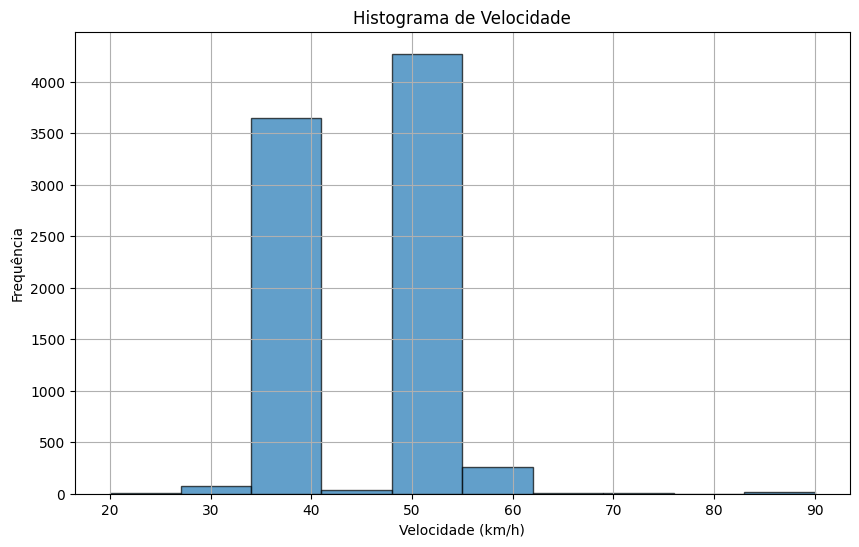

In [45]:
import matplotlib.pyplot as plt

# Criar o histograma
plt.figure(figsize=(10, 6))
edges_baseline['speed_kph'].hist(bins=10, edgecolor='black', alpha=0.7)

# Configurar rótulos e título
plt.xlabel('Velocidade (km/h)')
plt.ylabel('Frequência')
plt.title('Histograma de Velocidade')

# Mostrar o gráfico
plt.show()


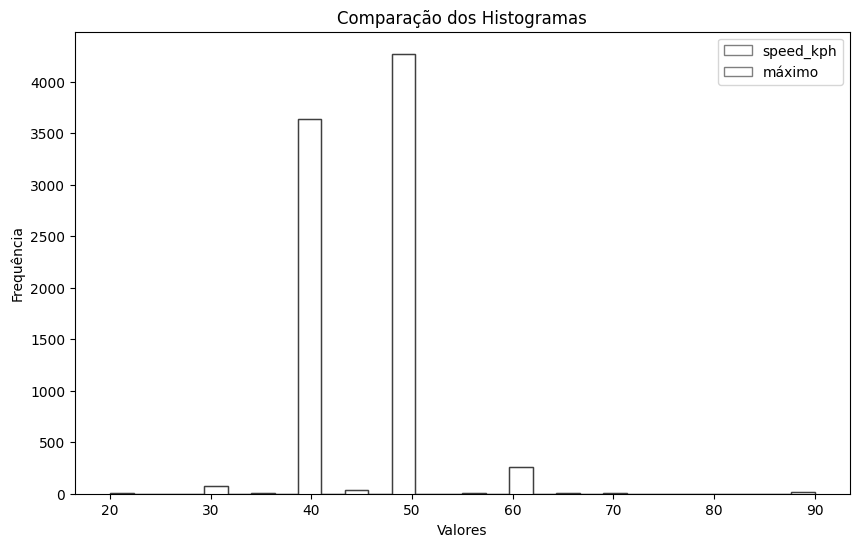

In [49]:
import matplotlib.pyplot as plt

# Criar a figura
plt.figure(figsize=(10, 6))

# Plotar os dois histogramas sobrepostos
plt.hist(edges_baseline['speed_kph'], bins=30, histtype='step', alpha=0.5, label='speed_kph', edgecolor='black', color='blue')
plt.hist(edges_baseline['pct1_h_2768400_max'], bins=30, histtype='step', alpha=0.5, label='máximo', edgecolor='black', color='red')

# Configurar rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Comparação dos Histogramas')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()


In [36]:
import pandas as pd

# Filtra as colunas cujo nome começa com 'pct'
pct_columns = [col for col in edges_baseline.columns if col.startswith('pct')]

# Cria bins para a coluna 'speed_kph'
speed_bins = pd.cut(edges_baseline['speed_kph'], bins=5)

# Inicializa um DataFrame para armazenar os resultados
result_df = pd.DataFrame({'speed_kph': speed_bins.astype(str)}).dropna()

# Itera pelas colunas selecionadas e adiciona ao DataFrame
for col in pct_columns:
    # Remove valores nulos de 'speed_kph' e da coluna atual
    temp_df = edges_baseline.dropna(subset=['speed_kph', col])

    # Cria bins para 'speed_kph'
    bins = pd.cut(temp_df['speed_kph'], bins=5)

    # Calcula a soma ou média da coluna atual por bins de speed_kph
    aggregated = temp_df.groupby(bins, observed=False)[col].sum()  # Use .mean() para média

    # Adiciona ao DataFrame de resultados
    result_df[col] = result_df['speed_kph'].map(aggregated)

# Preenche valores NaN com 0 (opcional, dependendo do contexto)
result_df.fillna(0, inplace=True)

# Exibe a tabela
print(result_df)

                                speed_kph  pct1_h_2707200  pct1_h_2743200  \
u           v           key                                                 
597447      25778775    0    (76.0, 90.0]             0.0             0.0   
25702002    2058923223  0    (48.0, 62.0]             0.0             0.0   
            25781819    0    (76.0, 90.0]             0.0             0.0   
25702039    4484722070  0    (76.0, 90.0]             0.0             0.0   
25778775    2350165221  0    (48.0, 62.0]             0.0             0.0   
...                                   ...             ...             ...   
12013065740 1256295212  0    (48.0, 62.0]             0.0             0.0   
            12013065742 0    (34.0, 48.0]             0.0             0.0   
12013065742 1269522830  0    (34.0, 48.0]             0.0             0.0   
            7284769687  0    (48.0, 62.0]             0.0             0.0   
            1269523805  0    (48.0, 62.0]             0.0             0.0   

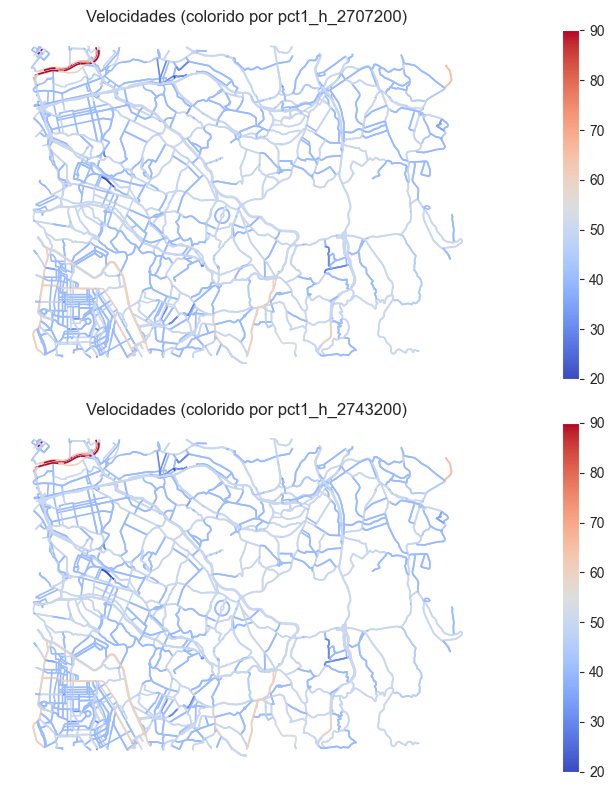

In [66]:
import matplotlib.pyplot as plt

# Configurar as colunas que você quer comparar
coluna1 = 'pct1_h_2707200'
coluna2 = 'pct1_h_2743200'

# Configurar o layout para dois mapas lado a lado
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Plotar o mapa da primeira coluna (com coloração pelos valores de velocidade)
edges_baseline.plot(
    column=coluna1, 
    ax=axes[0], 
    legend=True, 
    cmap='coolwarm',  # Mapa de cores ajustado
    linewidth=1.2,    # Largura das linhas dos segmentos
)
axes[0].set_title(f'Velocidades (colorido por {coluna1})')
axes[0].set_axis_off()

# Plotar o mapa da segunda coluna (com coloração pelos valores de velocidade)
edges_baseline.plot(
    column=coluna2, 
    ax=axes[1], 
    legend=True, 
    cmap='coolwarm', 
    linewidth=1.2
)
axes[1].set_title(f'Velocidades (colorido por {coluna2})')
axes[1].set_axis_off()

# Ajustar layout e mostrar o mapa
plt.tight_layout()
plt.show()